<a href="https://colab.research.google.com/github/Huangboran/Bo-ran-python-work/blob/master/12_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

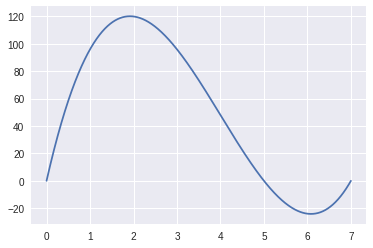

In [22]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
x=np.arange(0,7,0.0001)
y=x*(14-2*x)*(10-2*x)

plt.plot(x,y)
plt.show()

In [23]:
x = tf.Variable(tf.random_uniform([1], 0, 2.0))
print(x)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>


In [25]:
# 1.4 Build training graph.
loss = tf.reduce_mean(x*(14-2*x)*(10-2*x))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.01)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [26]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([1.7329319], dtype=float32)]


In [27]:
# 1.7 Perform training.
for step in range(1000):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
    # if step % 20 == 0:
    #    print(step, sess.run([W, b]))

print(sess.run([x]))

[array([1.9183339], dtype=float32)]


In [28]:
h = 1.9183
x = 14-2*h
x

10.1634

In [29]:
y = 10-2*h
y

6.1634

In [30]:
x*y*h

120.164421285948

In [32]:
import numpy as np

import multiprocessing
from collections import OrderedDict
import os
import time


def eval_iter(arg_lst, l_lst):
    for c_i, args in enumerate(arg_lst):
        yield c_i, args, l_lst


def eval_func(c_i, args, l_lst):
    assert len(args) == 3
    x = args[0]
    y = args[1]
    z = args[2]
    res = 1000-(x*y*z)
    #res = (200/(y+3.5)-2)*y
    print(f"Eval {x}, {y}, {z}: {res}")
    l_lst[c_i] = res


if __name__ == '__main__':

    generation_num = 100
    child_num = 5

    space = OrderedDict((
        ('x', (10., 11.)),
        ('y', (5., 7.)),
        ('z', (0., 2.))
    ))

    params = OrderedDict([(nm, []) for nm in space.keys()])
    for nm, v_range in space.items():
        params[nm] = np.random.uniform(v_range[0], v_range[1], size=child_num)

    arg_list = []
    for c_n in range(child_num):
        arg_list.append([val[c_n] for val in params.values()])

    manager = multiprocessing.Manager()
    loss_lst = manager.list([np.inf for i in range(child_num)])

    for r_n in range(generation_num):
        with multiprocessing.Pool(os.cpu_count()) as pool:
            pool.starmap(eval_func, eval_iter(arg_list, loss_lst))

        fittest_idx = int(np.argmin(loss_lst))
        base_args = arg_list[fittest_idx]
        print(f"Best {base_args}\n")

        # mutate offspring from fittest individual
        params = OrderedDict([(nm, []) for nm in space.keys()])
        for s_i, (nm, v_range) in enumerate(space.items()):
            std = (v_range[1] - v_range[0]) / 2
            noise = np.random.normal(0, std, size=child_num)
            new_param = base_args[s_i] + noise
            params[nm] = np.clip(new_param, v_range[0], v_range[1])

        arg_list = []
        for c_n in range(child_num):
            arg_list.append([val[c_n] for val in params.values()])

        loss_lst = manager.list([np.inf for i in range(child_num)])

Eval 10.462571078269091, 5.357805805920945, 1.289708089012797: 927.703576438355
Eval 10.552756377875083, 5.377532421266545, 1.9365365720581469: 890.1058301418296
Eval 10.833061806789964, 6.729639498697216, 1.462996408748585: 893.3437570945564
Eval 10.832664610523324, 6.899791818510176, 0.7631380055634709: 942.960676344393
Eval 10.120456959274254, 5.592224727259777, 0.748353189278381: 957.6463004408372
Best [10.552756377875083, 5.377532421266545, 1.9365365720581469]

Eval 10.641663138733808, 6.798512233528753, 0.3656098567114825: 973.5490492882446
Eval 10.0, 5.374121092875742, 2.0: 892.5175781424851
Eval 10.0, 7.0, 0.8209325125592157: 942.5347241208549
Eval 10.02897723112404, 5.486237580675131, 2.0: 889.9572964377442
Eval 10.789642053254527, 5.045265698109486, 1.5250606005026495: 916.980869421113
Best [10.02897723112404, 5.486237580675131, 2.0]

Eval 10.202113699042219, 6.832769380840382, 0.3700175285580065: 974.2065627691949
Eval 10.0, 5.436862742471351, 2.0: 891.262745150573
Eval 10.5